In [2]:
import os
import pandas as pd

def count_samples(dataset_root, processing_func):
    data = []
    if not os.path.exists(dataset_root):
        print(f"Dataset not found: {dataset_root}")
        return pd.DataFrame()
        
    for folder in os.listdir(dataset_root):
        folder_path = os.path.join(dataset_root, folder)
        if os.path.isdir(folder_path):
            split, dataset = processing_func(folder)
            if split:
                real_count = 0
                spoof_count = 0
                
                real_path = os.path.join(folder_path, 'real')
                spoof_path = os.path.join(folder_path, 'spoof')
                
                if os.path.exists(real_path):
                    real_count = len([name for name in os.listdir(real_path) if os.path.isfile(os.path.join(real_path, name))])
                if os.path.exists(spoof_path):
                    spoof_count = len([name for name in os.listdir(spoof_path) if os.path.isfile(os.path.join(spoof_path, name))])
                
                data.append({
                    'Dataset': dataset,
                    'Split': split,
                    'Real': real_count,
                    'Spoof': spoof_count,
                    'Total': real_count + spoof_count
                })
    return pd.DataFrame(data)

# LCC_FASD Processing
def process_lcc_fasd(folder_name):
    if 'training' in folder_name:
        return 'Train', 'LCC_FASD'
    elif 'development' in folder_name:
        return 'Val', 'LCC_FASD'
    elif 'evaluation' in folder_name:
        return 'Test', 'LCC_FASD'
    return None, None

# SiW Processing
def process_siw(folder_name):
    if folder_name == 'train':
        return 'Train', 'SiW'
    elif folder_name == 'val':
        return 'Val', 'SiW'
    elif folder_name == 'test':
        return 'Test', 'SiW'
    return None, None

lcc_fasd_root = 'data/LCC_FASD'
siw_root = 'data/SiW'

df_lcc = count_samples(lcc_fasd_root, process_lcc_fasd)
df_siw = count_samples(siw_root, process_siw)

final_df = pd.concat([df_lcc, df_siw], ignore_index=True)
final_df = final_df.sort_values(by=['Dataset', 'Split'])
final_df

,Dataset,Split,Real,Spoof,Total
1,LCC_FASD,Test,314,7266,7580
0,LCC_FASD,Train,1223,7076,8299
2,LCC_FASD,Val,405,2543,2948
3,SiW,Test,600,150,750
5,SiW,Train,4876,1210,6086
4,SiW,Val,600,150,750


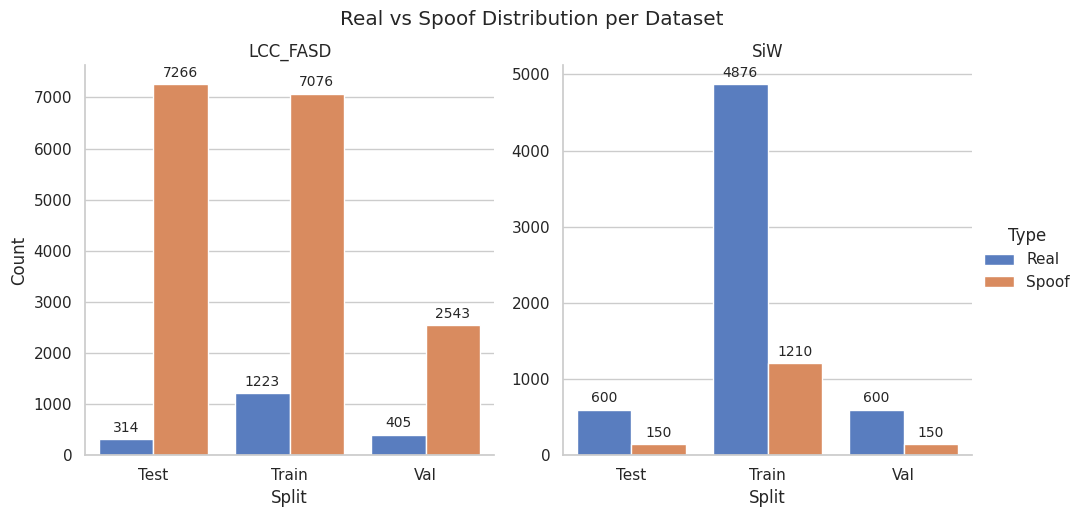

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe for plotting
melted_df = final_df.melt(id_vars=['Dataset', 'Split'], value_vars=['Real', 'Spoof'], var_name='Type', value_name='Count')

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=melted_df, kind="bar",
    x="Split", y="Count", hue="Type", col="Dataset",
    height=5, aspect=1, palette="muted",
    sharey=False
)

g.set_axis_labels("Split", "Count")
g.set_titles("{col_name}")
g.fig.suptitle("Real vs Spoof Distribution per Dataset", y=1.03)

# Add numeric labels
for ax in g.axes.flat:
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', fontsize=10, padding=3)

plt.show()